In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import nltk as nltk

### 1. Reading & Uploading Dataset 
---
Datset could be found [here](https://www.kaggle.com/datasets/achrafoukou/toxic-arabic-tweets-classification)

In [3]:
tweets = pd.read_csv("/content/toxic arabic tweets classification.txt", sep='\t', header=None) 
tweets.columns = ['Tweet', 'Class']
pd.set_option('display.max_colwidth',100)
tweets.head(10)

,Tweet,Class
0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد اليوم المساس بمقدساتنا من ربنا والهنا يسوع المسيح,abusive
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه سنيه شيعية واعادة توزيع ديموغرافي بسوريا,normal
2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف الشحادة و هذه نقطة ضعف لبنان ليبقى رهن سياسات اقل...,normal
3,وليد جنبلاط كاتب الحكمة يا قذر,abusive
4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشكلك,abusive
5,يا جبران باسيل يا معلم يا ريس يا استاذ بدك حضن سوريا روح لعندون مبروك علك سلفا هالحضن انما الحلم...,normal
6,ما سمعنا جعاركم مبارح على القصف الإسرائيلي يلي اغتصب سماء سوريا ، نباح و عويل جيش ابو شحاطة وصل ...,hate
7,نصيحة احكي مع الرئيس ميشال عون او هاجم جبران باسيل مليار دولار جابو من قطر شكرا قطر,normal
8,صافي يا بقر,abusive
9,لا تعتب عليه هيدا اسمه ابو صرماي,abusive


### 2. Exploring Dataset
---

In [4]:
tweets.tail()

,Tweet,Class
5841,أمير المليشيا مش خائن,normal
5842,صدقت يناسبك جدا جدا,normal
5843,لبخليني حب باسيل شغلتين,normal
5844,ليش تيوس الإمارت والسعودية مع السوريين واليمنيين شو ف خليك بصليبك تلحس بعضك,hate
5845,مش دفاعاً عن جبران باسيل بس كان لازم تحط المقطع عالقليلة بعد جملتين بعد هالكلمة لنفهم شو قال بدقة,normal


In [5]:
tweets.shape

(5846, 2)

In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   5846 non-null   object
 1   Class   5846 non-null   object
dtypes: object(2)
memory usage: 91.5+ KB


In [7]:
tweets.describe()

,Tweet,Class
count,5846,5846
unique,5754,3
top,نجحنا بقوتنا شكراً فخامة الرئيس ومعالي الوزير جبران باسيل,normal
freq,3,3650


In [8]:
tweets.Class.value_counts()

normal     3650
abusive    1728
hate        468
Name: Class, dtype: int64

In [9]:
tweets.Class.value_counts(normalize=True)

normal     0.624359
abusive    0.295587
hate       0.080055
Name: Class, dtype: float64

In [10]:
tweets.isnull().value_counts()

Tweet  Class
False  False    5846
dtype: int64

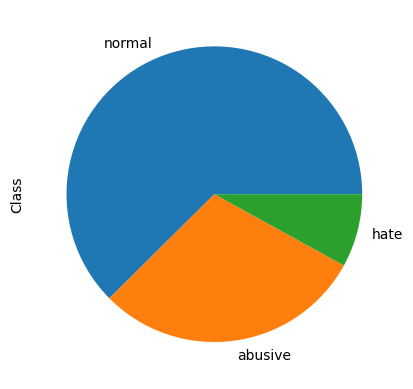

In [11]:
tweets.Class.value_counts(normalize=True).plot.pie()
plt.show()

In [12]:
copyTweetDataset = tweets.copy()
copyTweetDataset.head()

,Tweet,Class
0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد اليوم المساس بمقدساتنا من ربنا والهنا يسوع المسيح,abusive
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه سنيه شيعية واعادة توزيع ديموغرافي بسوريا,normal
2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف الشحادة و هذه نقطة ضعف لبنان ليبقى رهن سياسات اقل...,normal
3,وليد جنبلاط كاتب الحكمة يا قذر,abusive
4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشكلك,abusive


### 3. Pre-Processing 
---

1. Remove Punctuation Marks.
2. Strip vowel from a text and return a result text إزالة الحركات.
3. Strip tatweel from a text. tatweel character 'ـ' is used a lot in arabic writing. for example (يـ).
4. Normalize Hamza forms into one form, for example(أهؤلاء من أولئكُ >> اهءلاء من اولءكُ ). 
5. Normalize some spelling to make text unified like, "ة" into "ه" and "ئ" into "ي".
6. make one last column that has all normalization steps and drop the remaining columns.




In [13]:
pip install tashaphyne 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 13.8 MB/s eta 0:00:00


In [14]:
# 1. Remove Punctuation Marks.



import string

def remove_punct(text):
  neededPunct = ['!','#','؟','?']  # considering qustion mark both in arabic and english 
  text_nopunct = "".join([char for char in text if char not in string.punctuation or char in neededPunct ])
  return text_nopunct

tweets['Tweet Removed Punct'] = tweets['Tweet'].apply(lambda x: remove_punct(x))

import tashaphyne.normalize as ts #packge to normalize arabic text

#2. Strip vowel from a text and return a result text إزالة الحركات.
tweets['Tweet Removed tashkeel'] = tweets['Tweet Removed Punct'].apply(lambda x: 	ts.strip_tashkeel(x))

#3. Strip tatweel from a text. tatweel character 'ـ' is used a lot in arabic writing. for example (يـ).
tweets['Tweet Removed tatweel'] = tweets['Tweet Removed tashkeel'].apply(lambda x: 	ts.strip_tatweel(x))

#4. Normalize Hamza forms into one form, for example(أهؤلاء من أولئكُ >> اهءلاء من اولءكُ ). 
tweets['Tweet Hamza Norm'] = tweets['Tweet Removed tatweel'].apply(lambda x: 	ts.normalize_hamza(x))

#5. Normalize some spelling to make text unified like, "ة" into "ه" and "ئ" into "ي".
tweets['Tweet Normlised Spelling'] = tweets['Tweet Hamza Norm'].apply(lambda x: 	ts.normalize_spellerrors(x))

#6. make one last column that has all normalization steps and drop the remaining columns.
tweets['Tweet Normlised'] = tweets['Tweet Normlised Spelling']

tweets = tweets.drop(columns=["Tweet Removed Punct","Tweet Removed tashkeel", "Tweet Removed tatweel",'Tweet Hamza Norm','Tweet Normlised Spelling'])

tweets.head(5)




,Tweet,Class,Tweet Normlised
0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد اليوم المساس بمقدساتنا من ربنا والهنا يسوع المسيح,abusive,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد اليوم المساس بمقدساتنا من ربنا والهنا يسوع المسيح
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه سنيه شيعية واعادة توزيع ديموغرافي بسوريا,normal,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه سنيه شيعيه واعاده توزيع ديموغرافي بسوريا
2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف الشحادة و هذه نقطة ضعف لبنان ليبقى رهن سياسات اقل...,normal,و مصلحه لبنان تبدا باستخراج النفط و الغاز لوقف الشحاده و هذه نقطه ضعف لبنان ليبقي رهن سياسات اقل...
3,وليد جنبلاط كاتب الحكمة يا قذر,abusive,وليد جنبلاط كاتب الحكمه يا قذر
4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشكلك,abusive,شو بتلبقلك كلمه خنزير بتجي مفصله علي قياسك وشكلك


### 4. Tokenization 
---
1. tokenize white space
2. tokenize words and !, ?, #, ؟ 


The addition of ` ` to the regx ensures that certain abusive and hateful language elements such as !, ?, # are not overlooked during tokenization. By including these elements as separate tokens, they can be analyzed.

In [15]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re


def TokenizeRegx(tokenList):
  tokens = re.split(r'(\W+)', tokenList) # the regex \W+ will splits the string into tokens while preserving the non-word characters as separate tokens.
  tokens = [token for token in tokens if token.strip()] 
  return tokens


# 1. tokenize white space
tweets['Tweet Tokenize Word'] = tweets['Tweet Normlised'].apply(lambda x: word_tokenize(x)) 

# 2. tokenize words and !, ?, #, ؟ 
tweets['Tweet Tokenize Regx'] = tweets['Tweet Normlised'].apply(lambda x: TokenizeRegx(x)) 

tweets.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Tweet,Class,Tweet Normlised,Tweet Tokenize Word,Tweet Tokenize Regx
0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد اليوم المساس بمقدساتنا من ربنا والهنا يسوع المسيح,abusive,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد اليوم المساس بمقدساتنا من ربنا والهنا يسوع المسيح,"[الوزير, جبران, باسيل, تاج, راسك, يا, جربان, ممنوع, بعد, اليوم, المساس, بمقدساتنا, من, ربنا, وال...","[الوزير, جبران, باسيل, تاج, راسك, يا, جربان, ممنوع, بعد, اليوم, المساس, بمقدساتنا, من, ربنا, وال..."
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه سنيه شيعية واعادة توزيع ديموغرافي بسوريا,normal,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه سنيه شيعيه واعاده توزيع ديموغرافي بسوريا,"[صديقي, انت, ابن, جامعه, اللعبه, اكبر, من, داعش, اللعبه, سنيه, شيعيه, واعاده, توزيع, ديموغرافي, ...","[صديقي, انت, ابن, جامعه, اللعبه, اكبر, من, داعش, اللعبه, سنيه, شيعيه, واعاده, توزيع, ديموغرافي, ..."
2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف الشحادة و هذه نقطة ضعف لبنان ليبقى رهن سياسات اقل...,normal,و مصلحه لبنان تبدا باستخراج النفط و الغاز لوقف الشحاده و هذه نقطه ضعف لبنان ليبقي رهن سياسات اقل...,"[و, مصلحه, لبنان, تبدا, باستخراج, النفط, و, الغاز, لوقف, الشحاده, و, هذه, نقطه, ضعف, لبنان, ليبق...","[و, مصلحه, لبنان, تبدا, باستخراج, النفط, و, الغاز, لوقف, الشحاده, و, هذه, نقطه, ضعف, لبنان, ليبق..."
3,وليد جنبلاط كاتب الحكمة يا قذر,abusive,وليد جنبلاط كاتب الحكمه يا قذر,"[وليد, جنبلاط, كاتب, الحكمه, يا, قذر]","[وليد, جنبلاط, كاتب, الحكمه, يا, قذر]"
4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشكلك,abusive,شو بتلبقلك كلمه خنزير بتجي مفصله علي قياسك وشكلك,"[شو, بتلبقلك, كلمه, خنزير, بتجي, مفصله, علي, قياسك, وشكلك]","[شو, بتلبقلك, كلمه, خنزير, بتجي, مفصله, علي, قياسك, وشكلك]"


*italicized text*### 5. Removing Stop-words



---

In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword_ab= nltk.corpus.stopwords.words('arabic')

def remove_stopword(text):
  text_st = [word for word in text if word not in stopword_ab]
  return text_st

tweets['Tweet NoStopword'] =tweets['Tweet Tokenize Word'].apply(lambda x: remove_stopword(x))

tweets.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Tweet,Class,Tweet Normlised,Tweet Tokenize Word,Tweet Tokenize Regx,Tweet NoStopword
0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد اليوم المساس بمقدساتنا من ربنا والهنا يسوع المسيح,abusive,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد اليوم المساس بمقدساتنا من ربنا والهنا يسوع المسيح,"[الوزير, جبران, باسيل, تاج, راسك, يا, جربان, ممنوع, بعد, اليوم, المساس, بمقدساتنا, من, ربنا, وال...","[الوزير, جبران, باسيل, تاج, راسك, يا, جربان, ممنوع, بعد, اليوم, المساس, بمقدساتنا, من, ربنا, وال...","[الوزير, جبران, باسيل, تاج, راسك, جربان, ممنوع, اليوم, المساس, بمقدساتنا, ربنا, والهنا, يسوع, ال..."
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه سنيه شيعية واعادة توزيع ديموغرافي بسوريا,normal,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه سنيه شيعيه واعاده توزيع ديموغرافي بسوريا,"[صديقي, انت, ابن, جامعه, اللعبه, اكبر, من, داعش, اللعبه, سنيه, شيعيه, واعاده, توزيع, ديموغرافي, ...","[صديقي, انت, ابن, جامعه, اللعبه, اكبر, من, داعش, اللعبه, سنيه, شيعيه, واعاده, توزيع, ديموغرافي, ...","[صديقي, انت, ابن, جامعه, اللعبه, اكبر, داعش, اللعبه, سنيه, شيعيه, واعاده, توزيع, ديموغرافي, بسوريا]"
2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف الشحادة و هذه نقطة ضعف لبنان ليبقى رهن سياسات اقل...,normal,و مصلحه لبنان تبدا باستخراج النفط و الغاز لوقف الشحاده و هذه نقطه ضعف لبنان ليبقي رهن سياسات اقل...,"[و, مصلحه, لبنان, تبدا, باستخراج, النفط, و, الغاز, لوقف, الشحاده, و, هذه, نقطه, ضعف, لبنان, ليبق...","[و, مصلحه, لبنان, تبدا, باستخراج, النفط, و, الغاز, لوقف, الشحاده, و, هذه, نقطه, ضعف, لبنان, ليبق...","[مصلحه, لبنان, تبدا, باستخراج, النفط, الغاز, لوقف, الشحاده, نقطه, ضعف, لبنان, ليبقي, رهن, سياسات..."
3,وليد جنبلاط كاتب الحكمة يا قذر,abusive,وليد جنبلاط كاتب الحكمه يا قذر,"[وليد, جنبلاط, كاتب, الحكمه, يا, قذر]","[وليد, جنبلاط, كاتب, الحكمه, يا, قذر]","[وليد, جنبلاط, كاتب, الحكمه, قذر]"
4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشكلك,abusive,شو بتلبقلك كلمه خنزير بتجي مفصله علي قياسك وشكلك,"[شو, بتلبقلك, كلمه, خنزير, بتجي, مفصله, علي, قياسك, وشكلك]","[شو, بتلبقلك, كلمه, خنزير, بتجي, مفصله, علي, قياسك, وشكلك]","[شو, بتلبقلك, كلمه, خنزير, بتجي, مفصله, علي, قياسك, وشكلك]"


### 6. Stemming
---

In [17]:
	
from snowballstemmer import stemmer
ar_stemmer = stemmer("arabic")
#ar_stemmer.stemWord("فكتب")

In [18]:
def stemm(stemList):
  text = [ar_stemmer.stemWord(word) for word in stemList]
  return text

tweets['Tweet Stemming'] = tweets['Tweet NoStopword'].apply(lambda x: stemm(x))

tweets.head(5)



,Tweet,Class,Tweet Normlised,Tweet Tokenize Word,Tweet Tokenize Regx,Tweet NoStopword,Tweet Stemming
0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد اليوم المساس بمقدساتنا من ربنا والهنا يسوع المسيح,abusive,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد اليوم المساس بمقدساتنا من ربنا والهنا يسوع المسيح,"[الوزير, جبران, باسيل, تاج, راسك, يا, جربان, ممنوع, بعد, اليوم, المساس, بمقدساتنا, من, ربنا, وال...","[الوزير, جبران, باسيل, تاج, راسك, يا, جربان, ممنوع, بعد, اليوم, المساس, بمقدساتنا, من, ربنا, وال...","[الوزير, جبران, باسيل, تاج, راسك, جربان, ممنوع, اليوم, المساس, بمقدساتنا, ربنا, والهنا, يسوع, ال...","[وزير, جبران, باسيل, تاج, راس, جربان, ممنوع, يوم, مساس, مقدسا, ربنا, وال, يسوع, مسيح]"
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه سنيه شيعية واعادة توزيع ديموغرافي بسوريا,normal,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه سنيه شيعيه واعاده توزيع ديموغرافي بسوريا,"[صديقي, انت, ابن, جامعه, اللعبه, اكبر, من, داعش, اللعبه, سنيه, شيعيه, واعاده, توزيع, ديموغرافي, ...","[صديقي, انت, ابن, جامعه, اللعبه, اكبر, من, داعش, اللعبه, سنيه, شيعيه, واعاده, توزيع, ديموغرافي, ...","[صديقي, انت, ابن, جامعه, اللعبه, اكبر, داعش, اللعبه, سنيه, شيعيه, واعاده, توزيع, ديموغرافي, بسوريا]","[صديق, انت, ابن, جامع, لعبه, اكبر, داعش, لعبه, سني, شيع, واعاد, توزيع, ديموغراف, سوري]"
2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف الشحادة و هذه نقطة ضعف لبنان ليبقى رهن سياسات اقل...,normal,و مصلحه لبنان تبدا باستخراج النفط و الغاز لوقف الشحاده و هذه نقطه ضعف لبنان ليبقي رهن سياسات اقل...,"[و, مصلحه, لبنان, تبدا, باستخراج, النفط, و, الغاز, لوقف, الشحاده, و, هذه, نقطه, ضعف, لبنان, ليبق...","[و, مصلحه, لبنان, تبدا, باستخراج, النفط, و, الغاز, لوقف, الشحاده, و, هذه, نقطه, ضعف, لبنان, ليبق...","[مصلحه, لبنان, تبدا, باستخراج, النفط, الغاز, لوقف, الشحاده, نقطه, ضعف, لبنان, ليبقي, رهن, سياسات...","[مصلح, لبنان, تبد, باستخراج, نفط, غاز, لوقف, شحاده, نقط, ضعف, لبنان, ليبق, رهن, ياسا, اقليم, و…]"
3,وليد جنبلاط كاتب الحكمة يا قذر,abusive,وليد جنبلاط كاتب الحكمه يا قذر,"[وليد, جنبلاط, كاتب, الحكمه, يا, قذر]","[وليد, جنبلاط, كاتب, الحكمه, يا, قذر]","[وليد, جنبلاط, كاتب, الحكمه, قذر]","[ليد, جنبلاط, كاتب, حكمه, قذر]"
4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشكلك,abusive,شو بتلبقلك كلمه خنزير بتجي مفصله علي قياسك وشكلك,"[شو, بتلبقلك, كلمه, خنزير, بتجي, مفصله, علي, قياسك, وشكلك]","[شو, بتلبقلك, كلمه, خنزير, بتجي, مفصله, علي, قياسك, وشكلك]","[شو, بتلبقلك, كلمه, خنزير, بتجي, مفصله, علي, قياسك, وشكلك]","[شو, تلبقل, كلم, خنزير, بتج, مفصل, عل, قياس, شكل]"


### 7. Futures Extraction using TF-IDF

In [19]:
# more than 30 min 10.4GB Accuracy: 0.6757

# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=2, max_df=0.8)
# # Apply TF-IDF vectorization on your preprocessed tweet data
# X = vectorizer.fit_transform(tweets)
# print(X.shape)
# print('Sparse Matrix ;\n ', X)

# #tweets['Tweet Stemming'] = tweets['Tweet Stemming'].apply(str)

# tweets.head()

In [20]:
# took too long 8GB ram maybe 30 min and Accuracy: 0.6558 

# from sklearn.feature_extraction.text import TfidfVectorizer
# import pandas as pd
# tfidf = TfidfVectorizer()
# tfidf_vect = TfidfVectorizer(ngram_range=(2,2))
# features_lt = tfidf_vect.fit_transform(tweets['Tweet Stemming'].apply(str))
# print(features_lt.shape)
# features_cv_df = pd.DataFrame(features_lt.toarray())
# features_cv_df.columns = tfidf_vect.get_feature_names_out()
# features_cv_df

In [22]:
# maybe 10 min 4GB and Accuracy: 0.7482

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidf_vect = TfidfVectorizer()
features_lt = tfidf_vect.fit_transform(tweets['Tweet Stemming'].apply(str))
print(features_lt.shape)
features_cv_df = pd.DataFrame(features_lt.toarray())
features_cv_df.columns = tfidf_vect.get_feature_names_out()
features_cv_df


# Convert the n-grams list into text representations


(5846, 12191)


,2005,u200b,u200bالرءيس,u200bالقم,u200d,ءام,ءوب,ءوم,ءيس,اءسف,...,يونان,ييستفيد,ييقتل,يين,يييي,چولي,ڤالج,ڤنزويل,ڤودكا,ڤيتنام
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 8. Machine Learning Using SVM algorithm

In [25]:
target = tweets['Class']
final_tweets= tweets.drop(columns=["Tweet","Class", "Tweet Normlised",'Tweet Tokenize Word','Tweet Tokenize Regx','Tweet NoStopword','Tweet Stemming'])
features_cv_df.shape
final_tweets = pd.concat([final_tweets, pd.DataFrame(features_cv_df)], axis=1)
final_tweets.head()

,2005,u200b,u200bالرءيس,u200bالقم,u200d,ءام,ءوب,ءوم,ءيس,اءسف,...,يونان,ييستفيد,ييقتل,يين,يييي,چولي,ڤالج,ڤنزويل,ڤودكا,ڤيتنام
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(final_tweets, target, test_size=0.25 )

print("x_train " , x_train.shape)
print("x_test " , x_test.shape)
print("y_train " , y_train.shape)
print("y_test " , y_test.shape)

x_train.head()
y_train.head()


x_train  (4384, 12191)
x_test  (1462, 12191)
y_train  (4384,)
y_test  (1462,)


3849     normal
565        hate
779      normal
1550    abusive
449      normal
Name: Class, dtype: object

In [27]:
from sklearn.svm import SVC

# Create an instance of the SVM classifier
svm_model = SVC()

# Train the SVM model
svm_model.fit(x_train, y_train)

# Predict using the trained model
predictions = svm_model.predict(x_test)

# Evaluate the model
accuracy = svm_model.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.774281805745554


### Preview Dataset

In [23]:
tweets.head(20)

,Tweet,Class,Tweet Normlised,Tweet Tokenize Word,Tweet Tokenize Regx,Tweet NoStopword,Tweet Stemming
0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد اليوم المساس بمقدساتنا من ربنا والهنا يسوع المسيح,abusive,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد اليوم المساس بمقدساتنا من ربنا والهنا يسوع المسيح,"[الوزير, جبران, باسيل, تاج, راسك, يا, جربان, ممنوع, بعد, اليوم, المساس, بمقدساتنا, من, ربنا, وال...","[الوزير, جبران, باسيل, تاج, راسك, يا, جربان, ممنوع, بعد, اليوم, المساس, بمقدساتنا, من, ربنا, وال...","[الوزير, جبران, باسيل, تاج, راسك, جربان, ممنوع, اليوم, المساس, بمقدساتنا, ربنا, والهنا, يسوع, ال...","[وزير, جبران, باسيل, تاج, راس, جربان, ممنوع, يوم, مساس, مقدسا, ربنا, وال, يسوع, مسيح]"
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه سنيه شيعية واعادة توزيع ديموغرافي بسوريا,normal,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه سنيه شيعيه واعاده توزيع ديموغرافي بسوريا,"[صديقي, انت, ابن, جامعه, اللعبه, اكبر, من, داعش, اللعبه, سنيه, شيعيه, واعاده, توزيع, ديموغرافي, ...","[صديقي, انت, ابن, جامعه, اللعبه, اكبر, من, داعش, اللعبه, سنيه, شيعيه, واعاده, توزيع, ديموغرافي, ...","[صديقي, انت, ابن, جامعه, اللعبه, اكبر, داعش, اللعبه, سنيه, شيعيه, واعاده, توزيع, ديموغرافي, بسوريا]","[صديق, انت, ابن, جامع, لعبه, اكبر, داعش, لعبه, سني, شيع, واعاد, توزيع, ديموغراف, سوري]"
2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف الشحادة و هذه نقطة ضعف لبنان ليبقى رهن سياسات اقل...,normal,و مصلحه لبنان تبدا باستخراج النفط و الغاز لوقف الشحاده و هذه نقطه ضعف لبنان ليبقي رهن سياسات اقل...,"[و, مصلحه, لبنان, تبدا, باستخراج, النفط, و, الغاز, لوقف, الشحاده, و, هذه, نقطه, ضعف, لبنان, ليبق...","[و, مصلحه, لبنان, تبدا, باستخراج, النفط, و, الغاز, لوقف, الشحاده, و, هذه, نقطه, ضعف, لبنان, ليبق...","[مصلحه, لبنان, تبدا, باستخراج, النفط, الغاز, لوقف, الشحاده, نقطه, ضعف, لبنان, ليبقي, رهن, سياسات...","[مصلح, لبنان, تبد, باستخراج, نفط, غاز, لوقف, شحاده, نقط, ضعف, لبنان, ليبق, رهن, ياسا, اقليم, و…]"
3,وليد جنبلاط كاتب الحكمة يا قذر,abusive,وليد جنبلاط كاتب الحكمه يا قذر,"[وليد, جنبلاط, كاتب, الحكمه, يا, قذر]","[وليد, جنبلاط, كاتب, الحكمه, يا, قذر]","[وليد, جنبلاط, كاتب, الحكمه, قذر]","[ليد, جنبلاط, كاتب, حكمه, قذر]"
4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشكلك,abusive,شو بتلبقلك كلمه خنزير بتجي مفصله علي قياسك وشكلك,"[شو, بتلبقلك, كلمه, خنزير, بتجي, مفصله, علي, قياسك, وشكلك]","[شو, بتلبقلك, كلمه, خنزير, بتجي, مفصله, علي, قياسك, وشكلك]","[شو, بتلبقلك, كلمه, خنزير, بتجي, مفصله, علي, قياسك, وشكلك]","[شو, تلبقل, كلم, خنزير, بتج, مفصل, عل, قياس, شكل]"
5,يا جبران باسيل يا معلم يا ريس يا استاذ بدك حضن سوريا روح لعندون مبروك علك سلفا هالحضن انما الحلم...,normal,يا جبران باسيل يا معلم يا ريس يا استاذ بدك حضن سوريا روح لعندون مبروك علك سلفا هالحضن انما الحلم...,"[يا, جبران, باسيل, يا, معلم, يا, ريس, يا, استاذ, بدك, حضن, سوريا, روح, لعندون, مبروك, علك, سلفا,...","[يا, جبران, باسيل, يا, معلم, يا, ريس, يا, استاذ, بدك, حضن, سوريا, روح, لعندون, مبروك, علك, سلفا,...","[جبران, باسيل, معلم, ريس, استاذ, بدك, حضن, سوريا, روح, لعندون, مبروك, علك, سلفا, هالحضن, انما, ا...","[جبران, باسيل, معلم, ريس, استاذ, بدك, حضن, سوري, روح, لعند, مبر, علك, سلف, هالحض, انم, حلم, لعبت..."
6,ما سمعنا جعاركم مبارح على القصف الإسرائيلي يلي اغتصب سماء سوريا ، نباح و عويل جيش ابو شحاطة وصل ...,hate,ما سمعنا جعاركم مبارح علي القصف الاسراءيلي يلي اغتصب سماء سوريا ، نباح و عويل جيش ابو شحاطه وصل ...,"[ما, سمعنا, جعاركم, مبارح, علي, القصف, الاسراءيلي, يلي, اغتصب, سماء, سوريا, ،, نباح, و, عويل, جي...","[ما, سمعنا, جعاركم, مبارح, علي, القصف, الاسراءيلي, يلي, اغتصب, سماء, سوريا, ، , نباح, و, عويل, ...","[سمعنا, جعاركم, مبارح, علي, القصف, الاسراءيلي, يلي, اغتصب, سماء, سوريا, ،, نباح, عويل, جيش, ابو,...","[سمع, جعار, مبارح, عل, قصف, اسراءيل, يل, اغتصب, سماء, سوري, ،, نباح, عويل, جيش, ابو, شحاط, وصل, ..."
7,نصيحة احكي مع الرئيس ميشال عون او هاجم جبران باسيل مليار دولار جابو من قطر شكرا قطر,normal,نصيحه احكي مع الرءيس ميشال عون او هاجم جبران باسيل مليار دولار جابو من قطر شكرا قطر,"[نصيحه, احكي, مع, الرءيس, ميشال, عون, او, هاجم, جبران, باسيل, مليار, دولار, جابو, من, قطر, شكرا,...","[نصيحه, احكي, مع, الرءيس, ميشال,

**Resources:**
* Alomari, Khaled & Elsherif, Hatem & Shaalan, Khaled. (2017). Arabic Tweets Sentimental Analysis Using Machine Learning. 10.1007/978-3-319-60042-0_66. 

* Mahmud, Amal & Elghazaly, Tarek. (2018). Using Twitter to Monitor Political Sentiment for Arabic Slang. 10.1007/978-3-319-67056-0_4. 

* Elghazaly, Tarek & Mahmud, Amal & Hefny, Hesham. (2016). Political Sentiment Analysis Using Twitter Data. 1-5. 10.1145/2896387.2896396. 

### Lemmatization -- Canceled

---
Installing Qalsadi which is an Arabic Morphological Analyzer and lemmatizer for Python 

using the cammand `pip install qalsadi` commented below.

Documentation of this is found in this page: https://pypi.org/project/qalsadi/

🔴 The run of the lemmatizer would take 3-5 minutes 


In [ ]:
pip install qalsadi

In [ ]:
import qalsadi.lemmatizer

lemmer = qalsadi.lemmatizer.Lemmatizer()
def leem(leemist):
  text = [lemmer.lemmatize(word) for word in leemist]
  return text

tweets['Tweet Lemmatized'] = tweets['Tweet NoStopword'].apply(lambda x: leem(x))

"""
import json
import requests
url = 'https://farasa.qcri.org/webapi/lemmatization/'
text = 'يُشار إلى أن اللغة العربية' 
api_key = "#####################"
payload = {'text': text, 'api_key': api_key}
data = requests.post(url, data=payload)
#result = json.loads(data.text)
print(data) 
"""

### N-gram -- Canceled

In [ ]:
# import nltk as nl 
# from nltk.util import ngrams

# def ngramss(text):
#   fourgrams = nltk.bigrams(text)
#   return [i for i in fourgrams]

# tweets["ngrams"] =  tweets['Tweet Stemming'].apply(
#     lambda x: ngramss(x))

# tweets.head(5)

# tweets['ngrams'] = tweets['ngrams'].apply(lambda x: ' '.join(str(ngram) for ngram in x))

# tweets.head()